id : 해당 데이터에서의 고유한 ID(train, test와의 중복은 없음)
date : 버스 운행 날짜
route_id : 버스 노선 ID
vh_id : 버스 ID
route_nm : 버스 노선 실제 번호
now_latitude : 현재 정류소 위도
now_longitude : 현재 정류소 경도
now_station : 현재 정류소 이름   
now_arrive_time : 현재 정류장에 도착한 시간
distance : 현재 정류장에서 다음 정류장까지 실제 이동한 거리
next_station : 다음 정류소 이름
next_latitude : 다음 정류소의 위도
next_longitude : 다음 정류소의 경도
next_arrive_time : 다음 정류장에 도착할 때 까지 걸린 시간(단위:초)으로 답안 제출을 위해서 예측해야 되는 값

## **1. 라이브러리, 데이터 불러오기**

In [1]:
#기본 라이브러리
import numpy as np
import pandas as pd
import os
import time

#시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)


#그래프 스타일 서식 지정
plt.style.use('default')
#그래프 한글 폰트
from matplotlib import font_manager, rc
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

#사이킷런
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.model_selection import KFold # K-validation

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#차원축소
from sklearn.decomposition import PCA

#군집
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#회귀
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from xgboost import XGBRegressor # XGBoost Regressor 모델
from lightgbm import LGBMRegressor # XGBoost Regressor 모델

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as stats_PCA  # sklearn 의 PCA와 겹치지 않도록 별칭 지정
from statsmodels.multivariate.pca import pca as stats_pca




In [2]:
bus_df = pd.read_csv('data/6주차/bus_train.csv')
bus_df.head(10)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
5,5,2019-10-15,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,07시,417.0,대림2차아파트,33.478850,126.488350,160
6,6,2019-10-15,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,07시,334.0,연동대림1차아파트,33.480700,126.489933,58
7,7,2019-10-15,405136001,7997025,360-1,33.482142,126.483213,롯데마트,07시,341.0,원노형,33.483446,126.480758,64
8,8,2019-10-15,405136001,7997025,360-1,33.483446,126.480758,원노형,07시,185.0,노형오거리,33.485854,126.480530,54
9,9,2019-10-15,405136001,7997025,360-1,33.485854,126.480530,노형오거리,07시,252.0,남녕고등학교,33.488046,126.483112,204


## **2. EDA**

In [3]:
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB


In [4]:
bus_df.describe()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
count,210457.000000,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,105228.000000,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824
std,60753.847139,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170
min,0.000000,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000
25%,52614.000000,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000
50%,105228.000000,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000
75%,157842.000000,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000
max,210456.000000,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000


In [5]:
for i in bus_df:
    print(i, ':',bus_df[i].value_counts().count())

id : 210457
date : 14
route_id : 21
vh_id : 104
route_nm : 21
now_latitude : 562
now_longitude : 567
now_station : 348
now_arrive_time : 20
distance : 414
next_station : 351
next_latitude : 564
next_longitude : 569
next_arrive_time : 596


<AxesSubplot:>

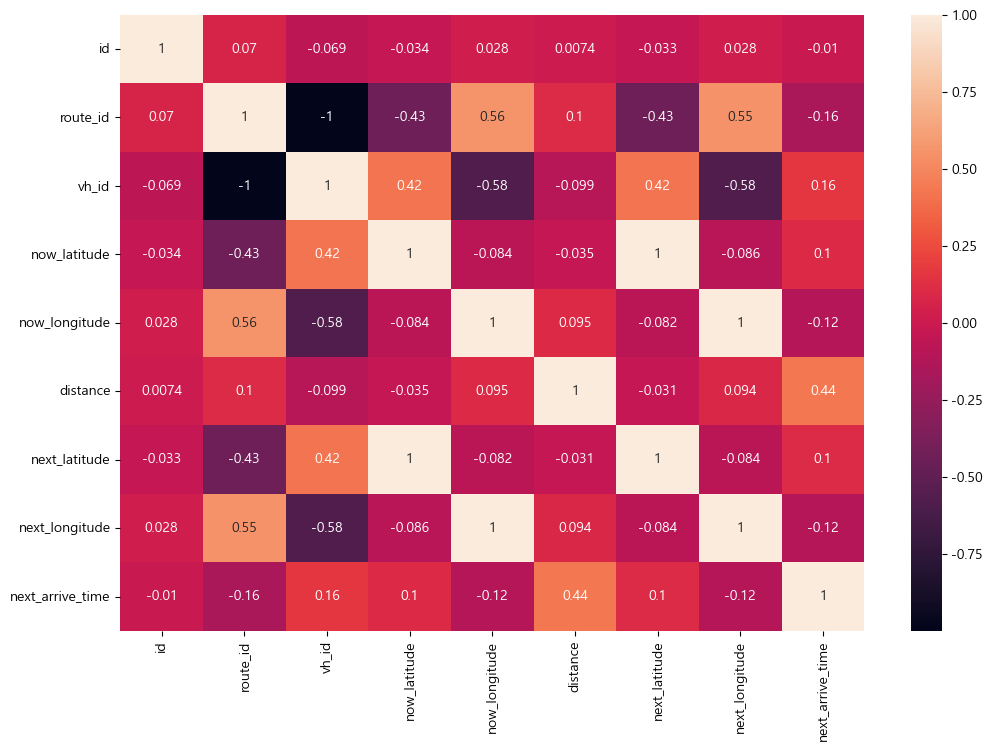

In [6]:
plt.figure(figsize=(12,8))

#plot heat map
sns.heatmap(bus_df.corr(), annot=True)

1. 이동 거리 ↔ 예상 시간
2. 현재 시간
3. 버스 노선 ID
4. 버스 운행 날짜
5. 현재 정류소 이름

In [7]:
bus_df = bus_df.drop(["id"], axis = 1)
bus_df = bus_df.drop(["vh_id"], axis = 1)
bus_df = bus_df.drop(["route_nm"], axis = 1)
bus_df = bus_df.drop(["now_latitude"], axis = 1)
bus_df = bus_df.drop(["now_longitude"], axis = 1)
bus_df = bus_df.drop(["next_latitude"], axis = 1)
bus_df = bus_df.drop(["next_longitude"], axis = 1)

## **3. Data Preprocess**

### **3-1. Date**

In [8]:
df = bus_df.copy()

In [9]:
df

,date,route_id,now_station,now_arrive_time,distance,next_station,next_arrive_time
0,2019-10-15,405136001,제주대학교입구,06시,266.0,제대마을,24
1,2019-10-15,405136001,제대마을,06시,333.0,제대아파트,36
2,2019-10-15,405136001,제대아파트,06시,415.0,제주대학교,40
3,2019-10-15,405136001,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),42
4,2019-10-15,405136001,도호동,07시,374.0,은남동,64
...,...,...,...,...,...,...,...
210452,2019-10-28,405328102,비석거리,21시,528.0,삼아아파트,96
210453,2019-10-28,405328102,동문로터리,21시,280.0,매일올레시장 7번입구,50
210454,2019-10-28,405328102,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,16
210455,2019-10-28,405328102,아랑조을거리 입구,21시,223.0,평생학습관,38


In [10]:
df_date = df["date"].unique()

In [11]:
df_date

array(['2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18',
       '2019-10-19', '2019-10-20', '2019-10-21', '2019-10-22',
       '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-26',
       '2019-10-27', '2019-10-28'], dtype=object)

- 2019-10-15 : 화요일
-2019-10-16 : 수요일
-2019-10-17 : 목요일
-2019-10-18 : 금요일 → 금요일 저녁
-2019-10-19 : 토요일 → 주말
-2019-10-20 : 일요일 → 주말
-2019-10-21 : 월요일
-2019-10-22 : 화요일
-2019-10-23 : 수요일
-2019-10-24 : 목요일
-2019-10-25 : 금요일 → 금요일 저녁
-2019-10-26 : 토요일 → 주말
-2019-10-27 : 일요일 → 주말
-2019-10-28 : 월요일

-평일 :0, 금요일: 1, 주말: 2

In [12]:
df_date[9]

'2019-10-24'

In [13]:
df.loc[df["date"] == df["date"].unique()[10], "date"]

153380    2019-10-25
153381    2019-10-25
153382    2019-10-25
153383    2019-10-25
153384    2019-10-25
             ...    
168294    2019-10-25
168295    2019-10-25
168296    2019-10-25
168297    2019-10-25
168298    2019-10-25
Name: date, Length: 14919, dtype: object

In [14]:
df["date"].unique()

array(['2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18',
       '2019-10-19', '2019-10-20', '2019-10-21', '2019-10-22',
       '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-26',
       '2019-10-27', '2019-10-28'], dtype=object)

In [15]:
df.loc[df["date"] == df_date[0], "date"] = 0
df.loc[df["date"] == df_date[1], "date"] = 0
df.loc[df["date"] == df_date[2], "date"] = 0
df.loc[df["date"] == df_date[3], "date"] = 1
df.loc[df["date"] == df_date[4], "date"] = 2
df.loc[df["date"] == df_date[5], "date"] = 2

df.loc[df["date"] == df_date[6], "date"] = 0
df.loc[df["date"] == df_date[7], "date"] = 0
df.loc[df["date"] == df_date[8], "date"] = 0
df.loc[df["date"] == df_date[9], "date"] = 0
df.loc[df["date"] == df_date[10], "date"] = 1
df.loc[df["date"] == df_date[11], "date"] = 2
df.loc[df["date"] == df_date[12], "date"] = 2

df.loc[df["date"] == df_date[13], "date"] = 0

In [16]:
df["date"].value_counts()

0    123450
2     57004
1     30003
Name: date, dtype: int64

In [17]:
df["now_arrive_time"].value_counts()

08시    13838
09시    13700
07시    13581
16시    13476
12시    13433
19시    13275
13시    13197
17시    13090
10시    13011
18시    12987
15시    12846
14시    12592
11시    12524
20시    11852
21시    11230
06시     8409
22시     6470
05시      487
23시      454
00시        5
Name: now_arrive_time, dtype: int64

In [18]:
df["now_arrive_time"].unique()

array(['06시', '07시', '08시', '09시', '10시', '11시', '13시', '14시', '16시',
       '17시', '18시', '19시', '20시', '21시', '12시', '15시', '22시', '05시',
       '23시', '00시'], dtype=object)

In [19]:
df.loc[df["now_arrive_time"] == "05시", "now_arrive_time"] = 0
df.loc[df["now_arrive_time"] == "06시", "now_arrive_time"] = 0
df.loc[df["now_arrive_time"] == "07시", "now_arrive_time"] = 0
df.loc[df["now_arrive_time"] == "08시", "now_arrive_time"] = 0
df.loc[df["now_arrive_time"] == "09시", "now_arrive_time"] = 1
df.loc[df["now_arrive_time"] == "10시", "now_arrive_time"] = 1
df.loc[df["now_arrive_time"] == "11시", "now_arrive_time"] = 1
df.loc[df["now_arrive_time"] == "12시", "now_arrive_time"] = 1
df.loc[df["now_arrive_time"] == "13시", "now_arrive_time"] = 2
df.loc[df["now_arrive_time"] == "14시", "now_arrive_time"] = 2
df.loc[df["now_arrive_time"] == "15시", "now_arrive_time"] = 2
df.loc[df["now_arrive_time"] == "16시", "now_arrive_time"] = 2
df.loc[df["now_arrive_time"] == "17시", "now_arrive_time"] = 2
df.loc[df["now_arrive_time"] == "18시", "now_arrive_time"] = 3
df.loc[df["now_arrive_time"] == "19시", "now_arrive_time"] = 3
df.loc[df["now_arrive_time"] == "20시", "now_arrive_time"] = 3
df.loc[df["now_arrive_time"] == "21시", "now_arrive_time"] = 3
df.loc[df["now_arrive_time"] == "22시", "now_arrive_time"] = 4
df.loc[df["now_arrive_time"] == "23시", "now_arrive_time"] = 4
df.loc[df["now_arrive_time"] == "00시", "now_arrive_time"] = 4

In [20]:
df["now_arrive_time"].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [21]:
df["now_arrive_time"].value_counts()

2    65201
1    52668
3    49344
0    36315
4     6929
Name: now_arrive_time, dtype: int64

### **3-2. Label encoder**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              210457 non-null  object 
 1   route_id          210457 non-null  int64  
 2   now_station       210457 non-null  object 
 3   now_arrive_time   210457 non-null  object 
 4   distance          210457 non-null  float64
 5   next_station      210457 non-null  object 
 6   next_arrive_time  210457 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.2+ MB


In [23]:
df['route_id'] = df['route_id'].astype(str)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              210457 non-null  object 
 1   route_id          210457 non-null  object 
 2   now_station       210457 non-null  object 
 3   now_arrive_time   210457 non-null  object 
 4   distance          210457 non-null  float64
 5   next_station      210457 non-null  object 
 6   next_arrive_time  210457 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 11.2+ MB


In [25]:
numeric_col = [col for col in df if df[col].dtype != "object" ]
object_col = [col for col in df if df[col].dtype == "object" ]

In [26]:
label = LabelEncoder()

for col in object_col:
    df[col] = pd.DataFrame(label.fit_transform(df[col]))
df[object_col].head()

,date,route_id,now_station,now_arrive_time,next_station
0,0,0,238,0,227
1,0,0,226,0,228
2,0,0,227,0,235
3,0,0,41,0,249
4,0,0,63,0,221


### **3-3. 이상치**

In [27]:
len(df)

210457

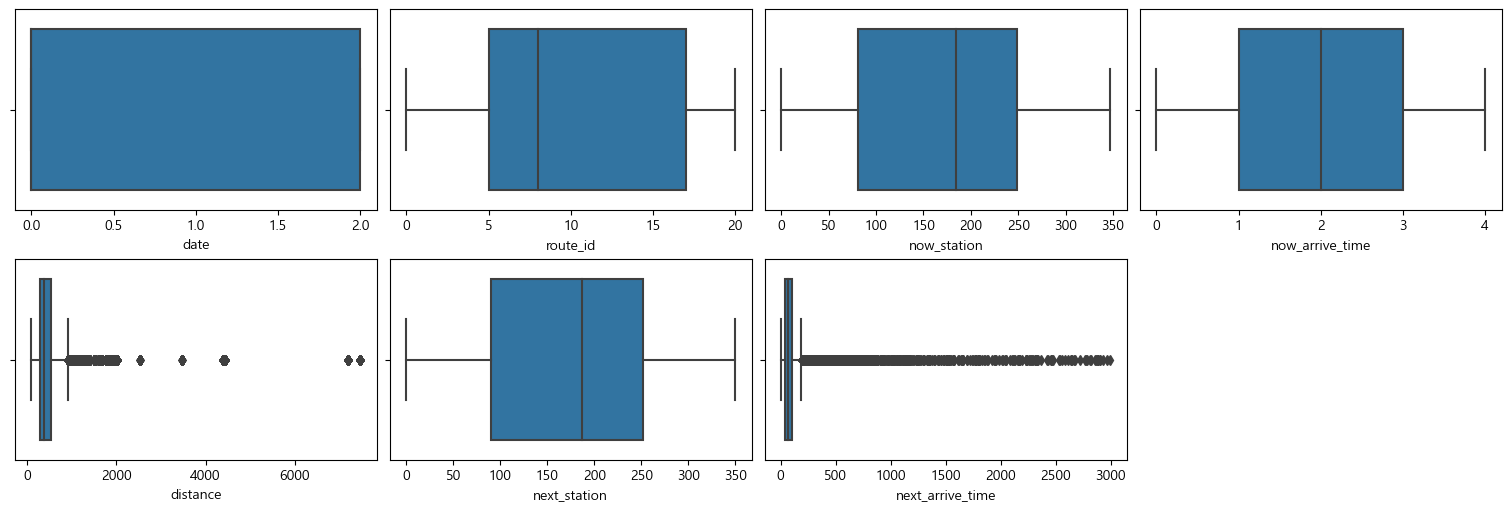

In [28]:
# boxplot을 사용한 이상치 확인

plt.figure(figsize=(15,5), constrained_layout = True )

for i in range(0, len(df.columns)):
    plt.subplot(2, 4, i+1) # 그래프 배열 4행 8열
    sns.boxplot(df.iloc[:, i])

In [29]:
def get_outlier(data, col_name):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    q1, q3 = np.percentile(data[col_name], [25, 75])
    iqr = q3-q1
    lowest_val = q1 - iqr*1.5
    highest_val = q3 + iqr*1.5

    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = data[col_name][(data[col_name] < lowest_val) | (data[col_name] > highest_val)].index
    print(len(outlier_index))
    data.drop(outlier_index, axis=0, inplace=True)
    print(data.shape)

    return outlier_index
print(df.shape)

#for col in numeric_col:
outlier_index = get_outlier(df, "distance")
df = df.drop(outlier_index, axis=0, inplace = True)

(210457, 7)
11834
(198623, 7)


KeyError: '[  2991   3006   3007 ... 210428 210429 210431] not found in axis'

In [30]:
outlier_index = get_outlier(df, "next_arrive_time")
df = df.drop(outlier_index, axis=0, inplace = True)

8697
(189926, 7)


KeyError: '[     9     15     40 ... 210418 210441 210449] not found in axis'

In [ ]:
# boxplot을 사용한 이상치 확인

plt.figure(figsize=(15,5), constrained_layout = True )

for i in range(0, len(df.columns)):
    plt.subplot(2, 4, i+1) # 그래프 배열 4행 8열
    sns.boxplot(df.iloc[:, i])

In [32]:
df_scaled = df

#rs = RobustScaler()

#df_scaled = pd.DataFrame(rs.fit_transform(df), columns=df.columns, index=df.index)

In [ ]:
# boxplot을 사용한 이상치 확인

plt.figure(figsize=(15,5), constrained_layout = True )

for i in range(0, len(df_scaled.columns)):
    plt.subplot(2, 4, i+1) # 그래프 배열 4행 8열
    sns.boxplot(df_scaled.iloc[:, i])

In [ ]:
from scipy.stats import norm, skew

numeric_col = [col for col in df_scaled if df_scaled[col].dtype != "object" ]

# 수치형 데이터에서 skewness 체크
skewed_feats = df_scaled[numeric_col].apply(lambda x : skew(x.dropna())).sort_values(ascending=False)

print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

In [ ]:
df_scew = df_scaled

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_scew[feat] = boxcox1p(df_scaled[feat], lam)

In [ ]:
# boxplot을 사용한 이상치 확인

plt.figure(figsize=(15,5), constrained_layout = True )

for i in range(0, len(df_scew.columns)):
    plt.subplot(2, 4, i+1) # 그래프 배열 4행 8열
    sns.boxplot(df_scew.iloc[:, i])

In [33]:
df_scaled.isnull().sum()

date                0
route_id            0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_arrive_time    0
dtype: int64

In [34]:
df_scaled = df_scaled.dropna(axis=0)

In [35]:
df_scaled.isnull().sum()

date                0
route_id            0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_arrive_time    0
dtype: int64

### **3-4. 상관관계**

<AxesSubplot:>

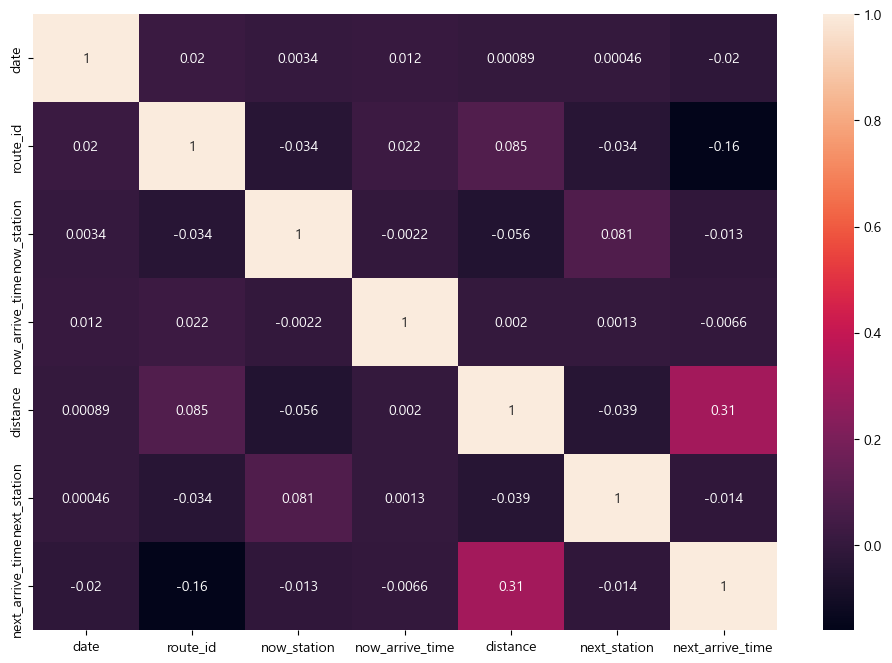

In [36]:
plt.figure(figsize=(12,8))

#plot heat map
sns.heatmap(df_scaled.corr(), annot=True)

### **3-5. 데이터 분리**

In [37]:
df_scaled

,date,route_id,now_station,now_arrive_time,distance,next_station,next_arrive_time
0,0,0,238,0,266.0,227,24
1,0,0,226,0,333.0,228,36
2,0,0,227,0,415.0,235,40
3,0,0,41,0,578.0,249,42
4,0,0,63,0,374.0,221,64
...,...,...,...,...,...,...,...
210452,0,20,95,3,528.0,108,96
210453,0,20,65,3,280.0,81,50
210454,0,20,121,3,114.0,178,16
210455,0,20,177,3,223.0,298,38


In [38]:
# 목표변수와 나머지 변수들을 따로 저장
x = df_scaled.drop(["next_arrive_time"], axis = 1)
y = df_scaled.iloc[:, -1]

In [39]:
x.isnull().sum()

date               0
route_id           0
now_station        0
now_arrive_time    0
distance           0
next_station       0
dtype: int64

In [40]:
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.3,
                                                      random_state = 0 )

## **4. 모델 학습하기**

### **4-1. 회귀 - 사이킷런**

In [41]:
x_train

,date,route_id,now_station,now_arrive_time,distance,next_station
199756,0,5,198,1,257.0,254
66254,2,5,21,1,253.0,107
166094,1,19,248,4,364.0,100
29419,0,19,41,0,355.0,177
163298,1,12,193,1,683.0,138
...,...,...,...,...,...,...
168829,2,0,184,3,455.0,240
196050,0,0,43,0,193.0,287
130726,0,9,217,2,346.0,115
192405,2,15,145,3,397.0,148


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# 책에서는 mean_absolute_error()를 MSE로 잘못 기재함. 
# MAE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

def get_model_predict(model, x_train, x_test, y_train, y_test):
    
    # 시작 시간 측정
    start = time.time() 
        
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
    
    # 끝 시간 측정
    end = time.time() 

    # 끝-시작 시간 print
    print('시간 :',end-start,'sec') 
# end of function get_model_predict    

In [43]:
# 모델 한꺼번에 돌리기

lasso = Lasso(alpha=0.001)
enet = ElasticNet()
krr = KernelRidge()
gboost = GradientBoostingRegressor()
xgb = XGBRegressor(random_state=110, verbosity=0, nthread=23, n_estimators=980, max_depth=4)
lgb = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)


models = [lasso, enet, gboost, xgb, lgb]

for i, model in enumerate(models):
    get_model_predict(model, x_train, x_test, y_train, y_test)

### Lasso ###
RMSLE: 0.483, RMSE: 34.352, MAE: 27.403
시간 : 0.020004749298095703 sec
### ElasticNet ###
RMSLE: 0.483, RMSE: 34.359, MAE: 27.412
시간 : 0.022005319595336914 sec
### GradientBoostingRegressor ###
RMSLE: 0.384, RMSE: 27.838, MAE: 21.367
시간 : 6.62449312210083 sec
### XGBRegressor ###
RMSLE: 0.306, RMSE: 22.747, MAE: 16.062
시간 : 13.011930704116821 sec
### LGBMRegressor ###
RMSLE: 0.367, RMSE: 26.504, MAE: 20.103
시간 : 1.5473487377166748 sec


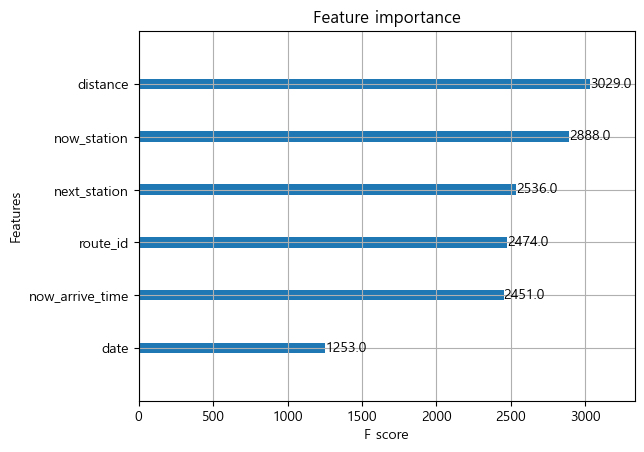

In [44]:
## 변수별 중요도 확인 ##
plot_importance(xgb)
plt.show()

### **4-2. 회귀 - statsmodel**

In [45]:
# `statsmodels.api.OLS()` 사용 시, fomula 형식의 파라미터 입력 불가. X, Y 를 따로 설정하여 입력
# 상수항을 따로 추가시켜주는 작업 필요.

# x_train에 상수항 추가
x_train_c = add_constant(x_train)

# 모델 생성
model = OLS(y_train, x_train_c)

# 모델 적합
fit_model = model.fit()

In [46]:
print( fit_model.summary(alpha = 0.05))

                            OLS Regression Results                            
Dep. Variable:       next_arrive_time   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     3324.
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:13:15   Log-Likelihood:            -6.5891e+05
No. Observations:              132948   AIC:                         1.318e+06
Df Residuals:                  132941   BIC:                         1.318e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              51.0191      0.409    1

결과해석 : https://ysyblog.tistory.com/119

In [47]:
# x_test에 상수항 추가 (x_train 은 모델 생성할 때 이미 추가한 상태)
x_test_c = add_constant( x_test )

# 예측
pred_train = fit_model.fittedvalues  # 또는 fit_model.predict( x_train_c )
pred_test = fit_model.predict( x_test_c )

# 잔차 계산
resid_train = fit_model.resid  # ( y_train - pred_train )도 가능
resid_test = y_test - pred_test

# 데이터프레임으로 출력
result_train = pd.DataFrame( {'y_Test' : y_train,
                              'Predict_Test' : pred_train,
                              'resid' : resid_train} )

result_test = pd.DataFrame( {'y_Test' : y_test,
                              'Predict_Test' : pred_test,
                              'resid' : resid_test} )

print('< 훈련 데이터로 예측한 결과 >')
display( result_train )
print()
print('< 테스트 데이터로 예측한 결과 >')
display( result_test )

< 훈련 데이터로 예측한 결과 >


,y_Test,Predict_Test,resid
199756,90,64.342658,25.657342
66254,160,63.215647,96.784353
166094,46,57.500269,-11.500269
29419,50,57.813270,-7.813270
163298,86,88.804657,-2.804657
...,...,...,...
168829,84,82.783889,1.216111
196050,34,64.711898,-30.711898
130726,52,67.170970,-15.170970
192405,60,63.438955,-3.438955



< 테스트 데이터로 예측한 결과 >


,y_Test,Predict_Test,resid
131725,56,92.848926,-36.848926
129326,34,61.646126,-27.646126
81165,128,74.756721,53.243279
169640,152,68.373294,83.626706
155137,154,80.853973,73.146027
...,...,...,...
24123,64,103.913337,-39.913337
174184,46,81.560236,-35.560236
92343,90,78.670727,11.329273
13993,44,67.506689,-23.506689


In [48]:
# 더빈-왓슨 통계량
print( 'Durbin-Watson 통계량:', durbin_watson( resid_train ) )
print()

Durbin-Watson 통계량: 1.9993801462092453



<AxesSubplot:>

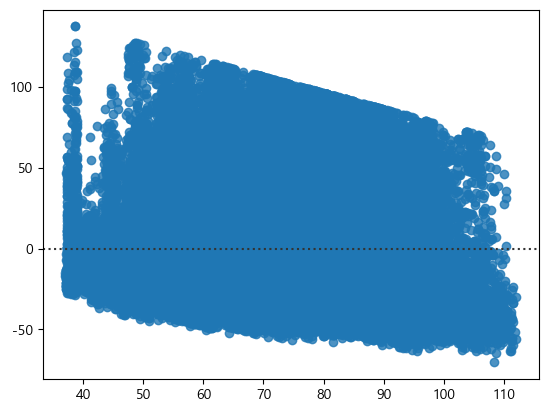

In [49]:
## Train Resid 분석
resid_train = y_train - pred_train
sns.residplot(pred_train, resid_train)

<AxesSubplot:>

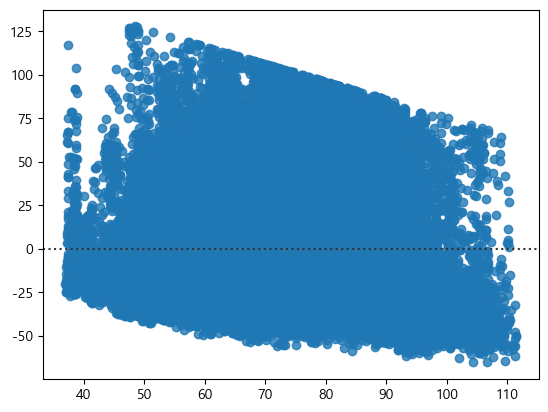

In [50]:
resid_test = y_test - pred_test
sns.residplot(pred_test, resid_test)

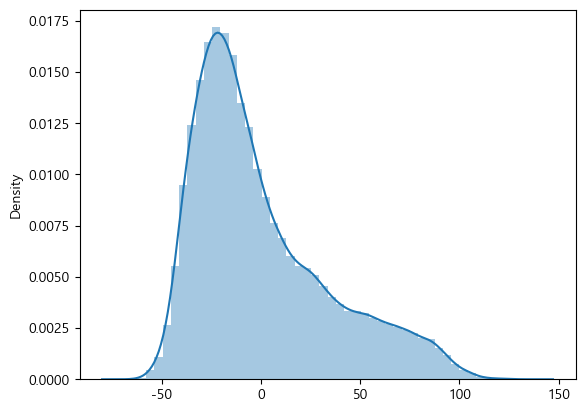

In [51]:
sns.distplot( resid_train )
plt.show()

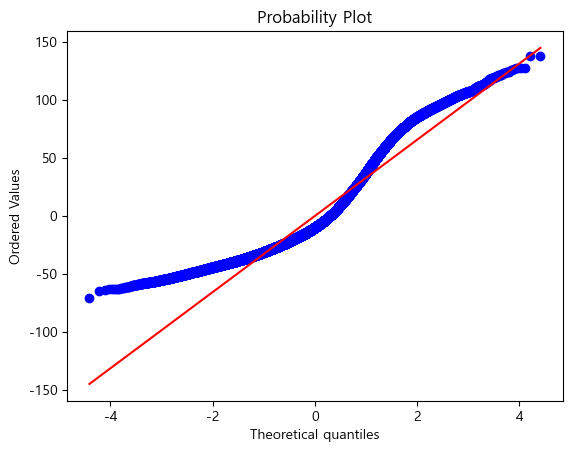

In [52]:
# Q-Q plot
stats.probplot( resid_train, plot = plt )
plt.show()
print()

참고

1. https://www.kaggle.com/subinium/subinium-tutorial-house-prices-advanced
2. https://colab.research.google.com/drive/13e3fuiAIIDJghpjWCCXmoTzVRjRqqYyt#scrollTo=9MvEYZx7Hn6Z
3. https://ysyblog.tistory.com/119